In [31]:
# pip install tslearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
## 일반적인 데이터프레임은 2차원 행렬로 되어있어서 KMeans 패키지를 사용해도 되지만 

Load Data

In [6]:
df = pd.read_csv('ts_example.csv', index_col=0)
df.head()

,t0,t1,t2,t3,t4,t5,t6
idx,,,,,,,
0,12,27,30,48,59,60,76
1,11,30,31,44,58,66,70
2,16,25,36,50,59,68,76
3,19,26,38,47,56,64,73
4,18,22,30,43,58,61,72


In [7]:
df.T
# 시간당 평균값을 확인

idx,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
t0,12,11,16,19,18,17,14,16,19,20,...,80,73,72,74,72,75,80,75,78,77
t1,27,30,25,26,22,22,27,29,22,25,...,60,67,65,60,61,64,68,68,64,70
t2,30,31,36,38,30,31,40,40,34,36,...,50,59,50,51,58,56,50,54,59,54
t3,48,44,50,47,43,41,44,50,47,44,...,49,42,44,47,43,48,50,41,43,44
t4,59,58,59,56,58,59,50,60,57,53,...,40,34,34,36,33,38,37,37,39,35
t5,60,66,68,64,61,68,60,65,70,60,...,26,23,25,29,24,27,29,24,23,30
t6,76,70,76,73,72,75,70,71,76,71,...,16,13,13,19,13,17,11,20,19,19


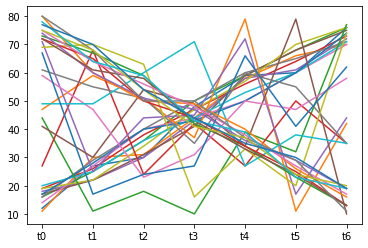

In [8]:
plt.plot(df.T)
plt.show()

Preprocessing

In [5]:
df1

,n1,n2,n3
0,-0.269230,-0.213619,-2.285782
1,0.744060,1.806842,0.187860
2,-0.216391,-0.177436,-0.298529
3,-1.129326,0.670056,-1.709666


In [4]:
import pandas as pd
import numpy as np
 
df1 = pd.DataFrame(np.random.randn(4,3),columns=['n1','n2','n3'])
 
for row_index, value in df1.iterrows():
 
   print (row_index,value)

0 n1   -0.269230
n2   -0.213619
n3   -2.285782
Name: 0, dtype: float64
1 n1    0.744060
n2    1.806842
n3    0.187860
Name: 1, dtype: float64
2 n1   -0.216391
n2   -0.177436
n3   -0.298529
Name: 2, dtype: float64
3 n1   -1.129326
n2    0.670056
n3   -1.709666
Name: 3, dtype: float64


In [9]:
df

,t0,t1,t2,t3,t4,t5,t6
idx,,,,,,,
0,12,27,30,48,59,60,76
1,11,30,31,44,58,66,70
2,16,25,36,50,59,68,76
3,19,26,38,47,56,64,73
4,18,22,30,43,58,61,72
5,17,22,31,41,59,68,75
6,14,27,40,44,50,60,70
7,16,29,40,50,60,65,71
8,19,22,34,47,57,70,76


In [25]:

avg_list = []
std_list = []

for idx, row in df.iterrows():
    print(idx,row)
    avg_list.append(row.mean())
    std_list.append(row.std())
    print()
# 일반적인 데이터프레임에서 컬럼을 추가할때 df['x'] = df['y'] + df['z'] / 2 이런 형식으로 작성될 수 있는데 
# 데이터프레임의 iterrows 함수를 사용하면 컬럼에 해당하는 각 인덱스의 데이터 값들을 
# 한번에 계산하거나 파악할 수 있어서 이후 수정에 있어서 효율적인 코드이기 때문에 사용했다.
# row는 list형식으로 출력된다. 그렇기 때문에 .mean() , .std() 같은 수학적 함수를 사용할 수 있는 것이다.

TypeError: 'int' object is not subscriptable

In [37]:
df['avg'] = avg_list
df['std'] = std_list
df.head()

,t0,t1,t2,t3,t4,t5,t6,avg,std
idx,,,,,,,,,
0,12,27,30,48,59,60,76,44.571429,22.463727
1,11,30,31,44,58,66,70,44.285714,21.638810
2,16,25,36,50,59,68,76,47.142857,22.363874
3,19,26,38,47,56,64,73,46.142857,19.777332
4,18,22,30,43,58,61,72,43.428571,20.911378


In [38]:
for i in range(len(df)):
    # i는 데이터의 전체 행
    for j in range(0, 7):
        # j 는 0~7의 열
        df.iloc[i, j] = (df.iloc[i, j] - df.iloc[i, 7]) / df.iloc[i, 8]
        # t0 ~ t6 까지의 기존 값들을 (실제값 - 평균) / 표준편차
        # 표준편차 = 루트(분산) = 루트(편차제곱의 평균) 따라서 (실제값 - 평균) = 편차
        # 편차/ 표준편차 = 편차/루트(편차제곱의 평균) = 편차제곱/편차제곱의 평균
        # 그냥 난수를 뽑기위해 임의로 계산한 값으로 추정 (팀원간의 의사소통으로 )
df.head()

,t0,t1,t2,t3,t4,t5,t6,avg,std
idx,,,,,,,,,
0,-1.449957,-0.782213,-0.648665,0.152627,0.642305,0.686822,1.399081,44.571429,22.463727
1,-1.538241,-0.660189,-0.613976,-0.013204,0.633782,1.003488,1.188341,44.285714,21.638810
2,-1.392552,-0.990117,-0.498253,0.127757,0.530192,0.932627,1.290346,47.142857,22.363874
3,-1.372423,-1.018482,-0.411727,0.043340,0.498406,0.902910,1.357976,46.142857,19.777332
4,-1.216016,-1.024733,-0.642166,-0.020495,0.696818,0.840281,1.366310,43.428571,20.911378


In [39]:
df = df.drop(['avg', 'std'], axis=1)
# 계산하기 위해 만들고 드랍한 것으로 추정
df.head()

,t0,t1,t2,t3,t4,t5,t6
idx,,,,,,,
0,-1.449957,-0.782213,-0.648665,0.152627,0.642305,0.686822,1.399081
1,-1.538241,-0.660189,-0.613976,-0.013204,0.633782,1.003488,1.188341
2,-1.392552,-0.990117,-0.498253,0.127757,0.530192,0.932627,1.290346
3,-1.372423,-1.018482,-0.411727,0.043340,0.498406,0.902910,1.357976
4,-1.216016,-1.024733,-0.642166,-0.020495,0.696818,0.840281,1.366310


Model1: Euclidean

In [28]:
model = TimeSeriesKMeans(n_clusters=3, metric='euclidean', random_state=121)
# KMeans 에서 metric의 default값은 euclidean , n_cluster는 3 으로 3개로 분류  random_state 는 난수 위치 설정

In [29]:
result = model.fit_predict(df)
result
# KMeans 로 시계열 데이터를 예측한다

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
df['clst'] = result
df.head()
# clst 는 result 값 즉(예측값으로 0,1,2 n_cluster 값이 된다. 각각 idx 데이터가 어떻게 군집 되었는지 확인) 

,t0,t1,t2,t3,t4,t5,t6,clst
idx,,,,,,,,
0,12,27,30,48,59,60,76,0
1,11,30,31,44,58,66,70,0
2,16,25,36,50,59,68,76,0
3,19,26,38,47,56,64,73,0
4,18,22,30,43,58,61,72,0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


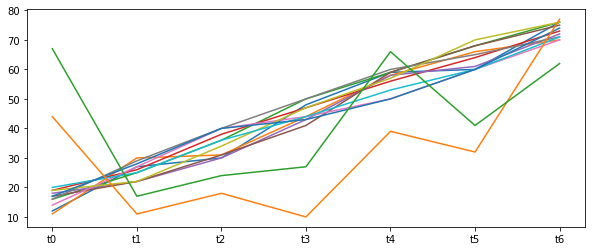

In [35]:
clst0 = df[df['clst']==0]
# clust == 0  인 것은 첫번째 군집에 대해 시각화 한것 
clst0.drop(['clst'], axis=1, inplace=True)
# 시각화를 했을때 y값이 0으로 모두 똑같이 떨어져서 (기존 시계열데이터가 아니라서 데이터를 묶고 버리는 선택)
plt.figure(figsize=(10, 4))
plt.plot(clst0.T)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


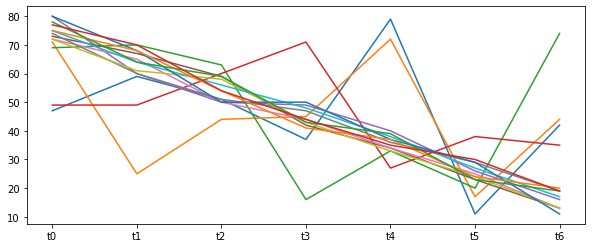

In [36]:
clst1 = df[df['clst']==1]
clst1.drop(['clst'], axis=1, inplace=True)
# 위와 동일
plt.figure(figsize=(10, 4))
plt.plot(clst1.T)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


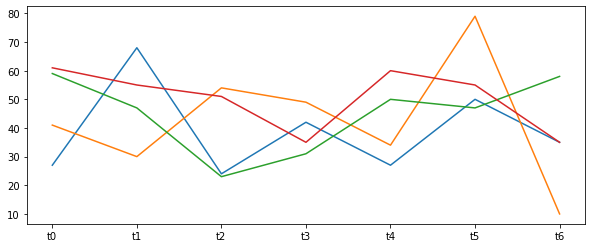

In [37]:
clst2 = df[df['clst']==2]
clst2.drop(['clst'], axis=1, inplace=True)
# 위와 동일
plt.figure(figsize=(10, 4))
plt.plot(clst2.T)
plt.show()

Model2: DTW

In [39]:
model2 = TimeSeriesKMeans(n_clusters=3, metric='dtw', random_state=121)
# 기존 metric를 default 값인 eculidian 대신 dtw 라는 함수를 사용했을 때 (다른 하이퍼파라미터는 동일)
# 즉 metric 파라미터만 다르게 했을때

In [40]:
result2 = model2.fit_predict(df)
result2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [41]:
df['clst'] = result2
df.head()

,t0,t1,t2,t3,t4,t5,t6,clst
idx,,,,,,,,
0,12,27,30,48,59,60,76,0
1,11,30,31,44,58,66,70,0
2,16,25,36,50,59,68,76,0
3,19,26,38,47,56,64,73,0
4,18,22,30,43,58,61,72,0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


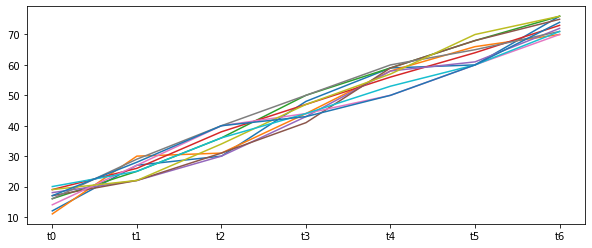

In [42]:
clst0 = df[df['clst']==0]
clst0.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst0.T)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


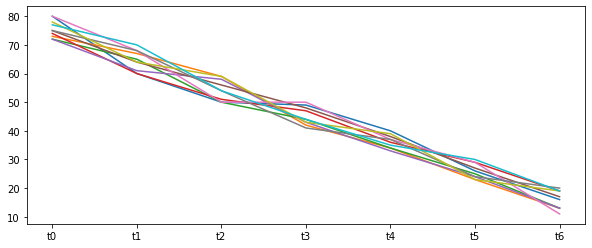

In [43]:
clst1 = df[df['clst']==1]
clst1.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst1.T)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


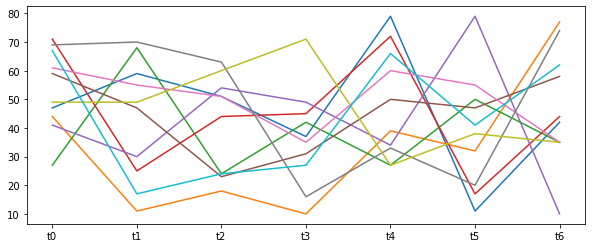

In [44]:
clst2 = df[df['clst']==2]
clst2.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst2.T)
plt.show()

In [ ]:
# 비교해봤을때 metric를 euclidian 대신 dtw 로 했을때 군집이 더 정확하게 된것을 확인할 수 있다.